# GroupBy 

## Split-Apply-Combine

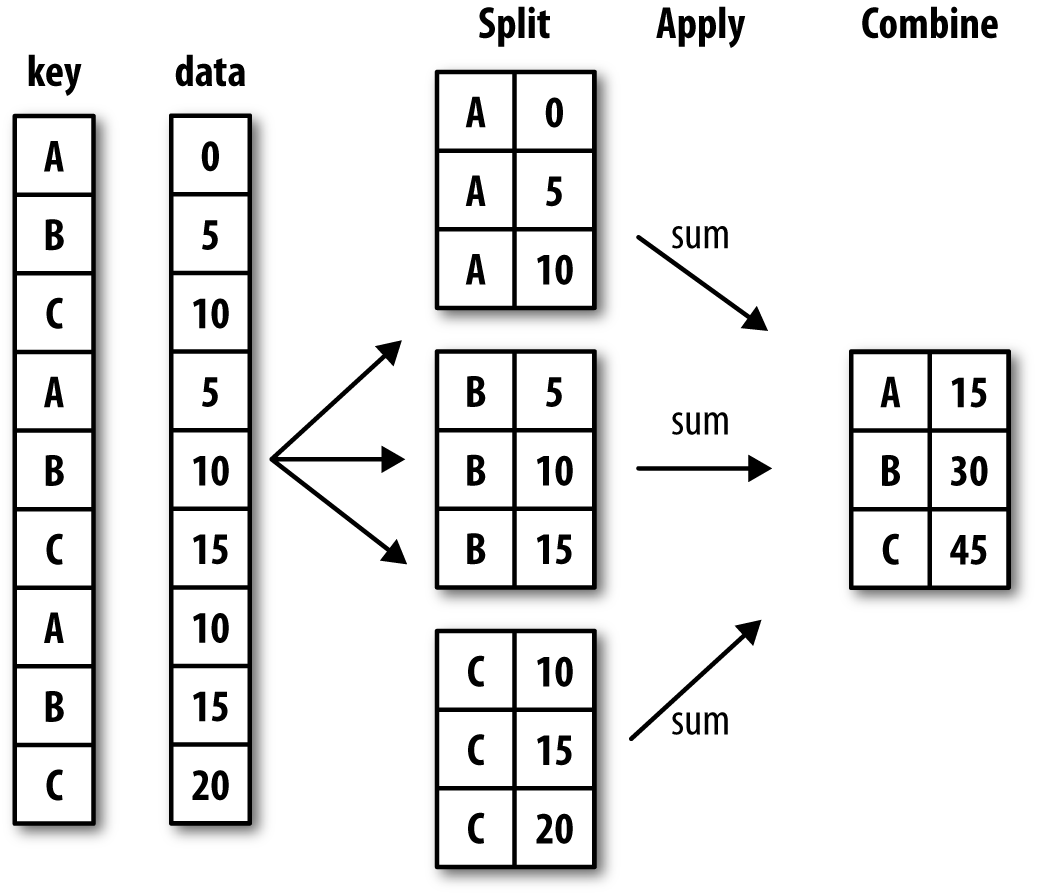




- Each grouping key can take many forms, and the keys do not have to be all of the same type:
-  A list or array of values that is the same length as the axis being grouped
-  A value indicating a column name in a DataFrame
- A dict or Series giving a correspondence between the values on the axis being grouped and the group names
- A function to be invoked on the axis index or the individual labels in the index

In [1]:
df = pd.DataFrame({'Sub' : ['Maths', 'Maths', 'Bio', 'Bio', 'Maths'],
....:
'Parameter' : ['Love', 'Hate', 'Love', 'Hate', 'Love'],
....:
'Stu_a' : [1,2,3,4,5],
....:
'Stu_b' : [10,11,12,13,14]})

<IPython.core.display.Javascript object>

In [2]:
df 

,Sub,Parameter,Stu_a,Stu_b
0,Maths,Love,1,10
1,Maths,Hate,2,11
2,Bio,Love,3,12
3,Bio,Hate,4,13
4,Maths,Love,5,14


- we want to compute mean of Stu_a from subject the way using groupby as follows

In [7]:
grouped = df['Stu_a'].groupby(df['Sub'])

In [8]:
grouped

In [9]:
grouped.mean()

Sub
Bio      3.500000
Maths    2.666667
Name: Stu_a, dtype: float64

In [10]:
grouped_b = df['Stu_b'].groupby(df['Sub'])

In [11]:
grouped_b.mean()

Sub
Bio      12.500000
Maths    11.666667
Name: Stu_b, dtype: float64

In [12]:
mean_a = df['Stu_a'].groupby([df['Sub'],df['Parameter']]).mean()

In [13]:
mean_a

Sub    Parameter
Bio    Hate         4
       Love         3
Maths  Hate         2
       Love         3
Name: Stu_a, dtype: int64

In [14]:
mean_b = df['Stu_b'].groupby([df['Sub'],df['Parameter']]).mean()

In [15]:
mean_b

Sub    Parameter
Bio    Hate         13
       Love         12
Maths  Hate         11
       Love         12
Name: Stu_b, dtype: int64

In [17]:
teacher = np.array(['Dheeraj', 'Varsha', 'Varsha', 'Dheeraj', 'Dheeraj'])

<IPython.core.display.Javascript object>

In [21]:
classs = np.array([10,10,11,10,11])

<IPython.core.display.Javascript object>

In [22]:
df['Stu_a'].groupby([teacher,classs]).mean()

Dheeraj  10    2.5
         11    5.0
Varsha   10    2.0
         11    3.0
Name: Stu_a, dtype: float64

In [23]:
df.groupby(['Sub', 'Parameter']).size()

Sub    Parameter
Bio    Hate         1
       Love         1
Maths  Hate         1
       Love         2
dtype: int64

# Iterating Over Groups

- The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data.

In [24]:
for name,group in df.groupby('Sub'):
    print(name)
    print(group)

Bio
   Sub Parameter  Stu_a  Stu_b
2  Bio      Love      3     12
3  Bio      Hate      4     13
Maths
     Sub Parameter  Stu_a  Stu_b
0  Maths      Love      1     10
1  Maths      Hate      2     11
4  Maths      Love      5     14


In [25]:
for (k1,k2),group in df.groupby(['Sub','Parameter']):
    print((k1,k2))
    print(group)

('Bio', 'Hate')
   Sub Parameter  Stu_a  Stu_b
3  Bio      Hate      4     13
('Bio', 'Love')
   Sub Parameter  Stu_a  Stu_b
2  Bio      Love      3     12
('Maths', 'Hate')
     Sub Parameter  Stu_a  Stu_b
1  Maths      Hate      2     11
('Maths', 'Love')
     Sub Parameter  Stu_a  Stu_b
0  Maths      Love      1     10
4  Maths      Love      5     14


In [26]:
g_type= df.groupby(df.dtypes, axis=1)

In [27]:
for a,b in g_type:
    print(a)
    print(b)

int64
   Stu_a  Stu_b
0      1     10
1      2     11
2      3     12
3      4     13
4      5     14
object
     Sub Parameter
0  Maths      Love
1  Maths      Hate
2    Bio      Love
3    Bio      Hate
4  Maths      Love


# Selecting a Column or Subset of Columns

In [28]:
df.groupby(['Sub', 'Parameter'])[['Stu_a']].mean()

Stu_a
Sub   Parameter       
Bio   Hate           4
      Love           3
Maths Hate           2
      Love           3

In [47]:
people = pd.DataFrame(np.random.randint(low=1,high=25,size=(5,5)),
....:
columns=['a', 'b', 'c', 'd', 'e'],
....:
index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
people

,a,b,c,d,e
Joe,13,15,5,18,7
Steve,6,22,3,24,20
Wes,14,11,21,23,16
Jim,21,18,19,3,20
Travis,4,9,11,22,18


In [50]:
people.iloc[3:4,[2,3]] = np.nan

<IPython.core.display.Javascript object>

In [51]:
people

,a,b,c,d,e
Joe,13,15,5.0,18.0,7
Steve,6,22,3.0,24.0,20
Wes,14,11,21.0,23.0,16
Jim,21,18,NaN,NaN,20
Travis,4,9,11.0,22.0,18


In [52]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
....:
'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [53]:
by_col = people.groupby(mapping,axis=1)

In [54]:
by_col

- red-joe-13+15+7=35
- blue-joe-5+18
- similar.....


In [55]:
by_col.sum()

,blue,red
Joe,23.0,35.0
Steve,27.0,48.0
Wes,44.0,41.0
Jim,0.0,59.0
Travis,33.0,31.0


# Group by Function

In [57]:
people.groupby(len).sum()

,a,b,c,d,e
3,48,44,26.0,41.0,43
5,6,22,3.0,24.0,20
6,4,9,11.0,22.0,18


In [58]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [59]:
people.groupby([len, key_list]).min()

a   b     c     d   e
3 one  13  11   5.0  18.0   7
  two  21  18   NaN   NaN  20
5 one   6  22   3.0  24.0  20
6 two   4   9  11.0  22.0  18